In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exercise 2 (a)

#Loading the data
# Assuming you have a CSV file named 'your_data.csv'
# Replace 'your_data.csv' with the actual file name and path if needed (in our case: cars-fixed04.dat)
cars04 = pd.read_csv('cars-fixed04.dat')

# Also you can load the data using the following URL:
#cars04 = pd.read_csv("http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/data/cars-fixed04.dat")

In [2]:
# Exercise 2 (a)

# Extracting numerical features
cars04.iloc[:, 7:18]

,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...
Volvo S80 2.9,37730,35542,2.9,6,208,20,28,3576,110,190,72
Volvo S80 T6,45210,42573,2.9,6,268,19,26,3653,110,190,72
Volvo V40,26135,24641,1.9,4,170,22,29,2822,101,180,68
Volvo XC70,35145,33112,2.5,5,208,20,27,3823,109,186,73


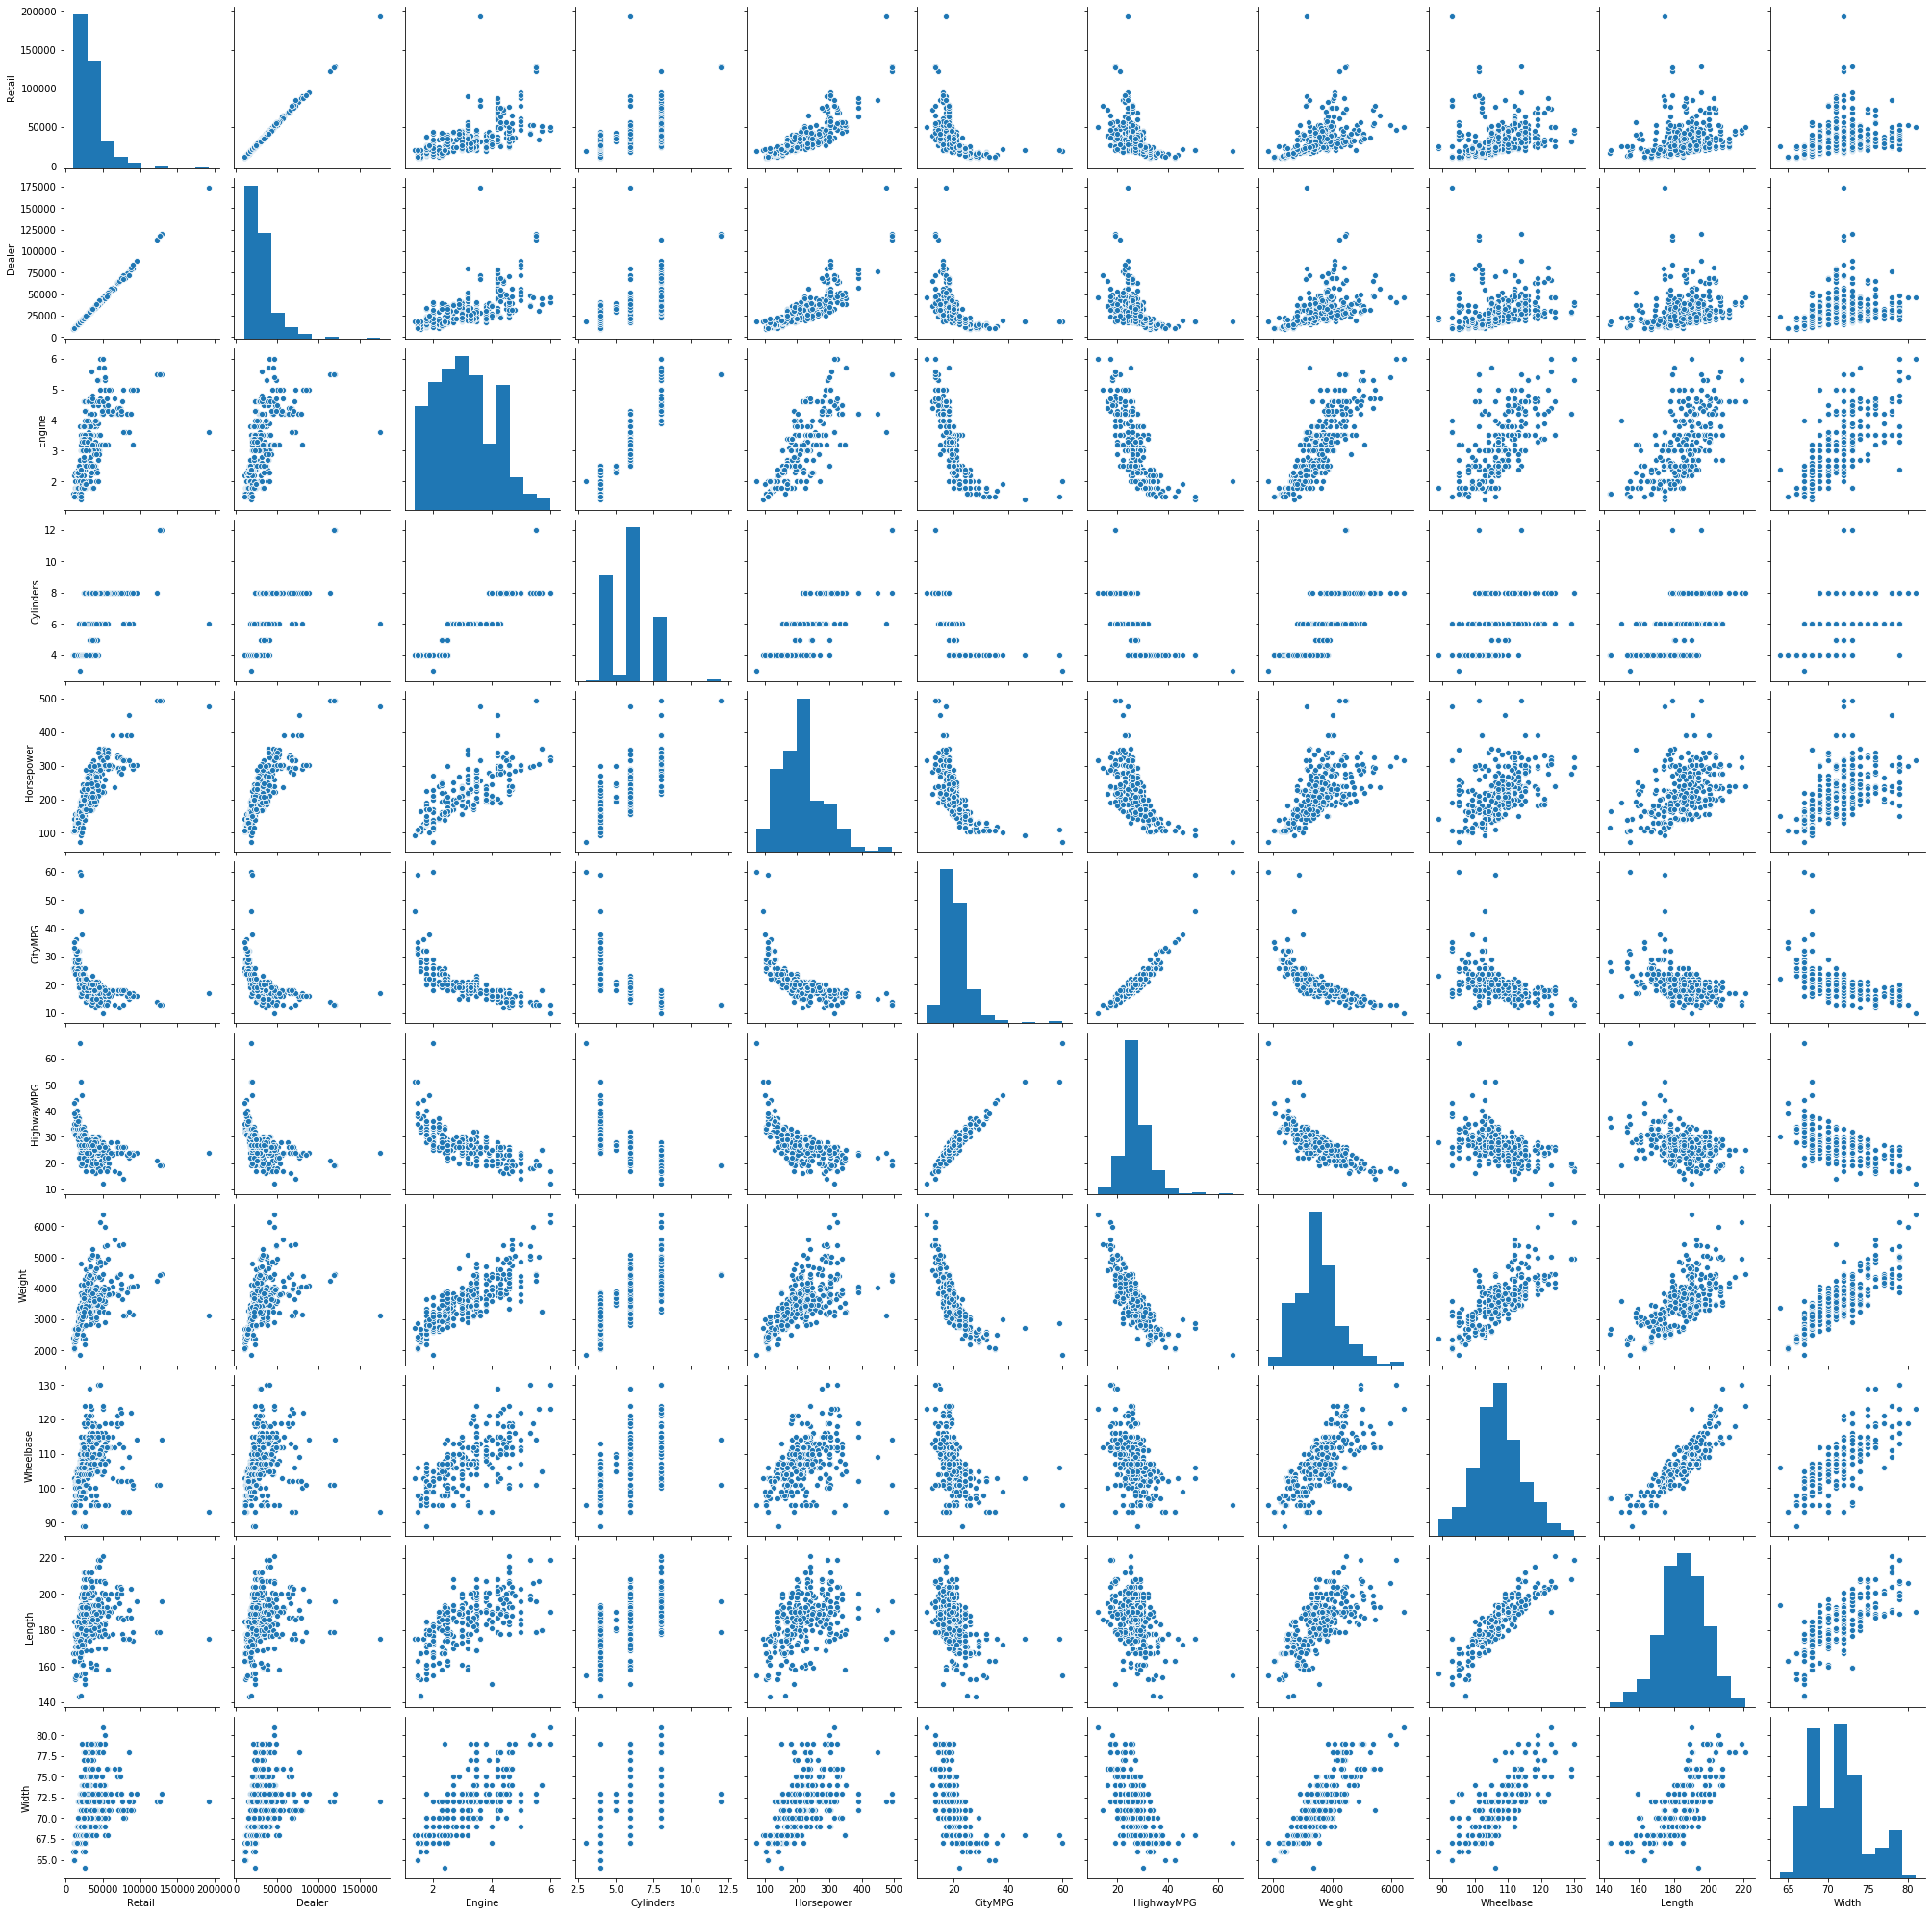

In [3]:
# Exercise 2 (a)

# Extracting numerical features
numerical_features = cars04.iloc[:, 7:18]

# Combine numerical features with categorical features if needed
# For this visualization, we are considering only numerical features

# Create a pairwise plot
sns.pairplot(numerical_features)
plt.show()

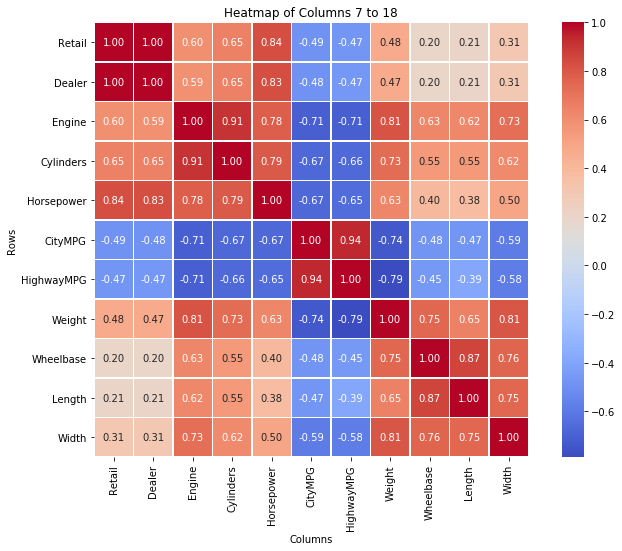

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exercise 2 (b)

# Extract columns 7 to 18 (indexing starts from 0)
selected_columns = cars04.iloc[:, 7:18]

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(selected_columns.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, square=True)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Heatmap of Columns 7 to 18')

# Show the plot
plt.show()


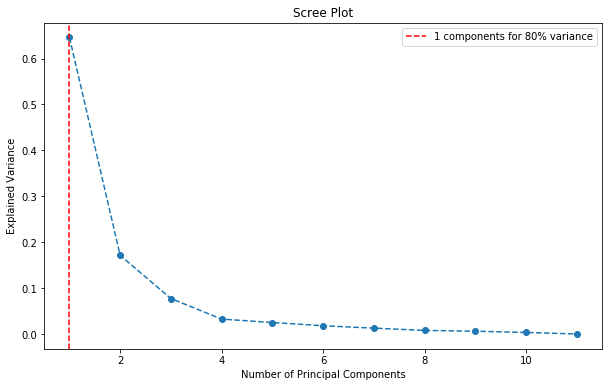

Loadings or Weight Matrix for the first two components:
                 PC1       PC2
Retail     -0.263750  0.468509
Dealer     -0.262319  0.470147
Engine     -0.347080 -0.015347
Cylinders  -0.334189  0.078032
Horsepower -0.318602  0.292213
CityMPG     0.310482 -0.003366
HighwayMPG  0.306589 -0.010964
Weight     -0.336329 -0.167464
Wheelbase  -0.266210 -0.418177
Length     -0.256790 -0.408411
Width      -0.296055 -0.312891
Comment:  Scree plot of the 2004 cars data: the eigenvalues of the principal components, in decreasing order. Each eigenvalue is the variance along that component.

Note: The sign of the principal components can be flipped based on the implementation details of the PCA algorithm. It's important to note that the direction of the principal components is arbitrary and can be reversed without affecting the information they represent. In the output from the PCA analysis, the signs of the loadings (coefficients) for each variable in the principal components are not fixed.

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Exercise 2 (c) without using cumulative sum on explained_variance_ratio

# Extracting numerical features
numerical_features = cars04.iloc[:, 7:18]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA()
pca.fit(numerical_features_standardized)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
explained_variance = explained_variance_ratio



# Find the number of components to explain at least 80% of the variance
n_components_80_percent = np.argmax(explained_variance >= 0.8) + 1

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.axvline(n_components_80_percent, color='red', linestyle='--', label=f'{n_components_80_percent} components for 80% variance')
plt.legend()
plt.show()

# Print the loadings or weight matrix for the first two components
print("Loadings or Weight Matrix for the first two components:")
loadings_matrix = pd.DataFrame(pca.components_[:2, :].T, columns=['PC1', 'PC2'], index=numerical_features.columns)
print(loadings_matrix)
print('Comment:  Scree plot of the 2004 cars data: the eigenvalues of the principal components, in decreasing order. Each eigenvalue is the variance along that component.\n')
print("Note: The sign of the principal components can be flipped based on the implementation details of the PCA algorithm. It's important to note that the direction of the principal components is arbitrary and can be reversed without affecting the information they represent. In the output from the PCA analysis, the signs of the loadings (coefficients) for each variable in the principal components are not fixed. They can be positive or negative depending on the specific algorithm and implementation. The key information lies in the magnitude and the relative signs among the loadings, rather than the absolute signs.")

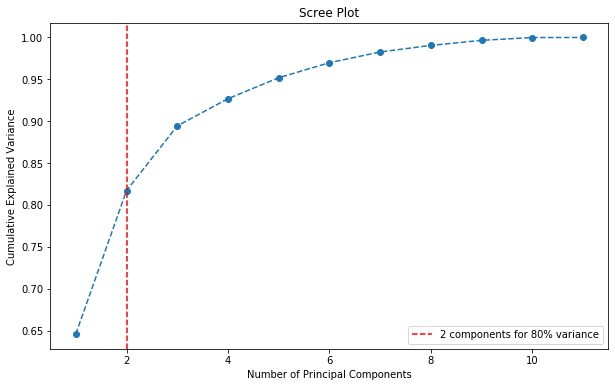

Loadings or Weight Matrix for the first two components:
                 PC1       PC2
Retail     -0.263750  0.468509
Dealer     -0.262319  0.470147
Engine     -0.347080 -0.015347
Cylinders  -0.334189  0.078032
Horsepower -0.318602  0.292213
CityMPG     0.310482 -0.003366
HighwayMPG  0.306589 -0.010964
Weight     -0.336329 -0.167464
Wheelbase  -0.266210 -0.418177
Length     -0.256790 -0.408411
Width      -0.296055 -0.312891
Note: The sign of the principal components can be flipped based on the implementation details of the PCA algorithm. It's important to note that the direction of the principal components is arbitrary and can be reversed without affecting the information they represent. In the output from the PCA analysis, the signs of the loadings (coefficients) for each variable in the principal components are not fixed. They can be positive or negative depending on the specific algorithm and implementation. The key information lies in the magnitude and the relative signs among the 

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Exercise 2 (c) with using cumulative sum on explained_variance_ratio


# Extracting numerical features
numerical_features = cars04.iloc[:, 7:18]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA()
pca.fit(numerical_features_standardized)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)



# Find the number of components to explain at least 80% of the variance
n_components_80_percent = np.argmax(cumulative_explained_variance >= 0.8) + 1

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(n_components_80_percent, color='red', linestyle='--', label=f'{n_components_80_percent} components for 80% variance')
plt.legend()
plt.show()

# Print the loadings or weight matrix for the first two components
print("Loadings or Weight Matrix for the first two components:")
loadings_matrix = pd.DataFrame(pca.components_[:2, :].T, columns=['PC1', 'PC2'], index=numerical_features.columns)
print(loadings_matrix)
print("Note: The sign of the principal components can be flipped based on the implementation details of the PCA algorithm. It's important to note that the direction of the principal components is arbitrary and can be reversed without affecting the information they represent. In the output from the PCA analysis, the signs of the loadings (coefficients) for each variable in the principal components are not fixed. They can be positive or negative depending on the specific algorithm and implementation. The key information lies in the magnitude and the relative signs among the loadings, rather than the absolute signs.")

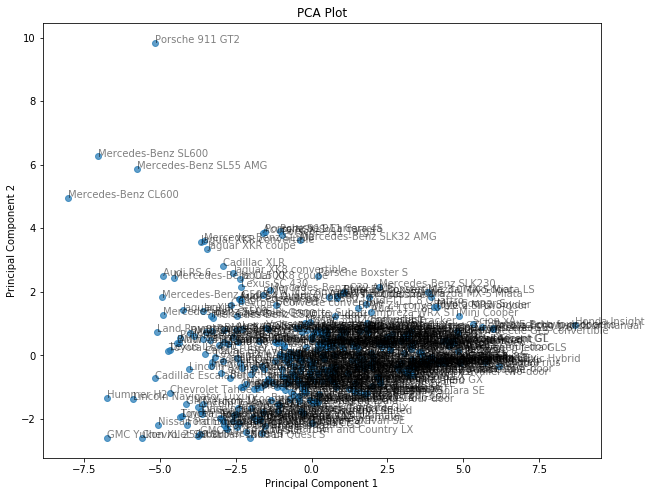

Comment 1:  In this Biplot, each point represents a car in the dataset, and its position is determined by its projections onto the 1st and 2nd PCs.

Comment 2:
 - The plot provides a visual representation of how the cars relate to each other in the reduced-dimensional space defined by the first two principal components.
 - Points that are close together in the plot are similar in terms of the numerical features, while points that are far apart (like: Porsche 911 GT2, Mercedes-Benz SL600, Mercedes-Benz SL55 AMG, Mercedes-Benz CL600) have distinct numerical feature patterns.
 - The direction of the points along the principal components indicates the contribution of each original variable to the components.


In [8]:
# Exercise 2 (d)

# Extracting numerical features
numerical_features = cars04.iloc[:, 7:18]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA()
pca.fit(numerical_features_standardized)

# Transform the data
transformed_data = pca.transform(numerical_features_standardized)

# Create a PCA plot
plt.figure(figsize=(10, 8))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add labels for each data point if needed
for i, label in enumerate(cars04.index):
    plt.annotate(label, (transformed_data[i, 0], transformed_data[i, 1]), alpha=0.5)

plt.show()
print("Comment 1:  In this Biplot, each point represents a car in the dataset, and its position is determined by its projections onto the 1st and 2nd PCs.\n")
print("Comment 2:\n - The plot provides a visual representation of how the cars relate to each other in the reduced-dimensional space defined by the first two principal components.\n - Points that are close together in the plot are similar in terms of the numerical features, while points that are far apart (like: Porsche 911 GT2, Mercedes-Benz SL600, Mercedes-Benz SL55 AMG, Mercedes-Benz CL600) have distinct numerical feature patterns.\n - The direction of the points along the principal components indicates the contribution of each original variable to the components.")

In [ ]:
# References:
# Advanced Data Analysis from an Elementary Point of View (by Cosma Rohilla Shalizi) available at https://www.stat.cmu.edu/~cshalizi/ADAfaEPoV/
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# https://seaborn.pydata.org/generated/seaborn.heatmap.html